In [9]:
import numpy as np
import pandas as pd
import matplotlib 
import sklearn
import torch

import platform

print('Scikit-learn', sklearn.__version__)
print('pyTorch', torch.__version__)
print('NVIDIA GPU:', torch.cuda.is_available())
print('Platform:', platform.system())

Scikit-learn 1.5.2
pyTorch 2.5.1
NVIDIA GPU: True
Platform: Linux


In [2]:
%pwd

'/home/me/pydeep'

In [10]:
import numpy as np

x = list(range(10))
print(type(x),len(x))
print(x)

print(x + x)
assert x + x == x * 2

#원소별 곱하기
x2 = [원소 * 2 for 원소 in x]
print(x2)
try:
    assert x2 == x * 2, '같지 않음'
except AssertionError as e:
    print(e)


<class 'list'> 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
같지 않음


In [18]:
import numpy as np

x = np.array(range(10))
print(type(x),len(x))
print(x)

print(x + x)
assert np.all(x + x == x * 2)

print('2-D 텐서')
x2 = x.reshape(2, 5)
print(type(x2),x2.dtype)
print(len(x2), x2.shape,f'{x2.ndim}-D')
print(x2)

print(x2-x2)  
assert np.all(x2 - x2 == 0)


<class 'numpy.ndarray'> 10
[0 1 2 3 4 5 6 7 8 9]
[ 0  2  4  6  8 10 12 14 16 18]
2-D 텐서
<class 'numpy.ndarray'> int64
2 (2, 5) 2-D
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 0 0 0 0]
 [0 0 0 0 0]]


# 시각화

In [26]:
시작, 끝, 개수 = 0, 10, 100
x = np.linspace(시작, 끝, 개수)
y = np.sin(x)
print(x.shape, 'sin(x) =>', y.shape)
print(x[:5].round(2), '...', x[-5:].round(2))

(100,) sin(x) => (100,)
[0.  0.1 0.2 0.3 0.4] ... [ 9.6  9.7  9.8  9.9 10. ]


In [35]:
시작, 끝, 간격 = 0, 1, 0.1
x1 = np.arange(시작, 끝, 간격)
print(x1)
개수 = 10
x2 = np.linspace(시작, 끝, 개수)
print(x2.round(3))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.    0.111 0.222 0.333 0.444 0.556 0.667 0.778 0.889 1.   ]


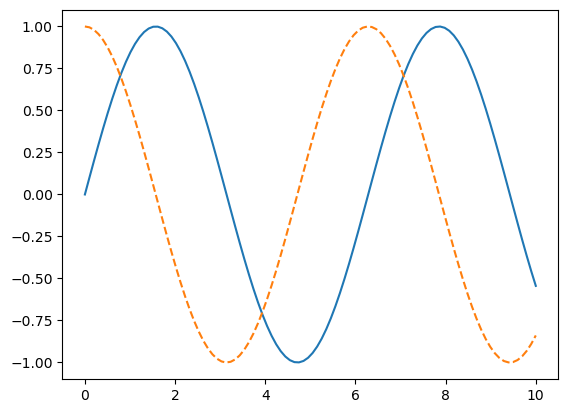

In [29]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.plot(x, np.cos(x), linestyle='--')
plt.show()

<class 'numpy.ndarray'> uint8 높이, 너비, 채널 = (640, 640, 3)
[[162 169 174]
 [166 169 172]
 [169 169 168]]


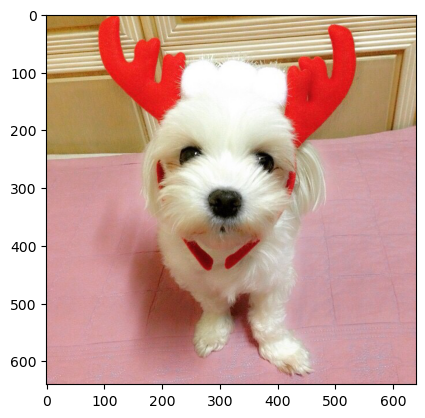

In [50]:
from matplotlib.image import imread
img = imread('mozzi.jpg')
print(type(img), img.dtype, '높이, 너비, 채널 =', img.shape)
plt.imshow(img)
print(img[:3, :3, 0])
plt.show()

# 선형 회귀

기울기(계수): 1.01455860109677
절편: 0.0810966934907156
결정계수(R^2): 0.9045064239642229


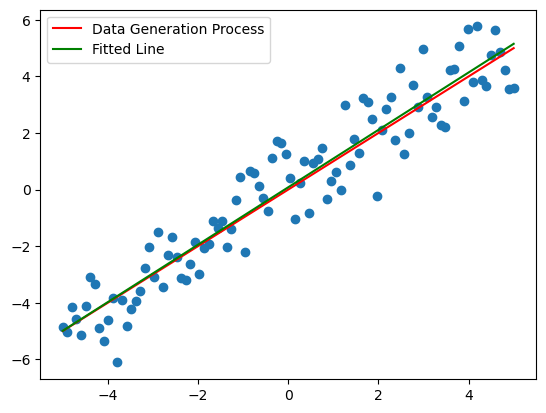

In [ ]:
from sklearn.linear_model import LinearRegression

난수생성기 = np.random.default_rng(seed=0)
xs = np.linspace(-5, 5, 100)
noise = 난수생성기.normal(0, 1, xs.shape) # 평균 0, 표준편차 1인 정규분포 난수 생성
ys = xs + noise

model = LinearRegression()
data = xs.reshape(-1, 1)  # sklearn은 2D 입력을 기대함
target = ys
model.fit(data, target)
#학습된 매계변수
print('기울기(계수):', model.coef_[0])
print('절편:', model.intercept_)

model_score = model.score(data, target)
print('결정계수(R^2):', model_score)

plt.scatter(xs, ys)
plt.plot(xs, ys-noise, color='red', label = 'Data Generation Process')  # 실제 직선
plt.plot(xs, model.predict(data), color='green', label = 'Fitted Line')  # 모델이 찾은 직선
plt.legend()
plt.show()

# 캘리포니아 주택 가격

특성 ~ 목표값

예: 소득 ~ 주택가격

In [72]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
print(type(housing))
print(housing.keys())
print(housing.data.shape, housing.target.shape)
#print(housing.data[:5])

housing.frame = pd.DataFrame(housing.data, columns=housing.feature_names) # 넘파이 배열을 데이터프레임으로 변환
print(housing.frame.describe().round(2)) #기술통계량 출력
housing.frame.sample(5, random_state=0).round(2) #무작위로 5행 출력




<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8) (20640,)
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  
count  20640.00   20640.00  
mean      35.63    -119.57  
std        2.14       2.00  
min       32.54    -124.35  
25%       33.93    -121.80  
50%       34.26    -118.49  
75%       

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.15,22.0,5.66,1.08,1551.0,4.18,32.58,-117.05
10101,5.78,32.0,6.11,0.93,1296.0,3.02,33.92,-117.97
20566,4.35,29.0,5.93,1.03,1554.0,2.91,38.65,-121.84
2670,2.45,37.0,4.99,1.32,390.0,2.75,33.20,-115.60
15709,5.00,25.0,4.32,1.04,649.0,1.71,37.79,-122.43


In [68]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

train_data, test_data, train_target, test_target = train_test_split(
    housing.data, housing.target, test_size=0.25, shuffle=True, random_state=0)

model = LinearRegression()
model.fit(train_data, train_target)
model_score = model.score(test_data, test_target)
print('결정계수(R^2):', model_score)

test_pred = model.predict(test_data)
mse = mean_squared_error(test_target, test_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

w = model.coef_
b = model.intercept_
print('y=',' +'.join(f'{wi:.3f} x{i}' for i, wi in enumerate(w)), f'+ {b:.3f}')

scores = {}
# 각 평가지표별로 완벽한 예측(perfect), 기준선(baseline), 학습 데이터(train), 테스트 데이터(test) 점수를 계산
# np.full : 주어진 shape의 배열을 특정 값으로 채워서 생성
# mean_absolute_error : 평균 절대 오차
scores['MAE'] = {
    'perfect': mean_absolute_error(test_target, test_target),
    'baseline': mean_absolute_error(test_target, np.full(test_target.shape, np.mean(train_target))),
    'train': mean_absolute_error(train_target, model.predict(train_data)),
    'test': mean_absolute_error(test_target, test_pred)
}

scores['R^2'] = {
    'perfect': r2_score(test_target, test_target),
    'baseline': r2_score(test_target, np.full(test_target.shape, np.mean(train_target))),
    'train': model.score(train_data, train_target),
    'test': model.score(test_data, test_target)
}

pd.DataFrame(scores).round(3)



결정계수(R^2): 0.5911695436410482
RMSE: 0.7351277481981676
y= 0.439 x0 +0.010 x1 +-0.103 x2 +0.617 x3 +-0.000 x4 +-0.004 x5 +-0.417 x6 +-0.431 x7 + -36.610


,MAE,R^2
perfect,0.000,1.000
baseline,0.914,-0.000
train,0.530,0.611
test,0.537,0.591


# PyTorch

In [118]:
import torch as torch

x = np.arange(10)
print(type(x), x.dtype, x.shape, x.ndim)
print(x)
print(x-x)
assert np.all(x - x == 0)

x = torch.arange(10)
print(x.dtype, x.shape, x.ndim)
print(x)
print(x - x)
assert torch.all(x - x == 0)

# torch.tensor -> numpy.ndarray
x = x.numpy()
print(type(x), x.dtype, x.shape, x.ndim)

#CPU -> GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('사용 장치:', device)

x = torch.arange(10)
print(x.device) # 기본 장치는 CPU
x2 = x.to(device)
print(x2.device) # 변경된 장치 : GPU (가능한 경우)

assert torch.all(x2 - x2 == 0) # GPU 상에서 연산

# try:
#     assert torch.all(x - x2 == 0) 
# except AssertionError as e:
#     print(e)  # 서로 다른 장치에 있는 텐서 간 연산 불가

# 장치를 일치시켜 연산
assert torch.all(x-x2.cpu() == 0) # CPU로 맞춤
assert torch.all(x.to(x2.device) - x2 == 0) # GPU로 맞춤

x = x.numpy() # CPU -> numpy.ndarray
print(type(x))

try:
    x2 = x2.numpy()  # GPU 상의 텐서를 numpy.ndarray로 변환 시도
except Exception as e:
    print(e)  # 오류 발생 # GPU 상의 텐서는 바로 numpy.ndarray로 변환 불가

x2 = x2.cpu().numpy()  # GPU -> CPU -> numpy.ndarray
print(type(x2))


<class 'numpy.ndarray'> int64 (10,) 1
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 0 0]
torch.int64 torch.Size([10]) 1
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
<class 'numpy.ndarray'> int64 (10,) 1
사용 장치: cuda
cpu
cuda:0
<class 'numpy.ndarray'>
can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
<class 'numpy.ndarray'>


# 1943 MCP 뉴런

In [ ]:
import pandas as pd

x = np.linspace(0, 1, 5)
print(x)

random = np.random.default_rng(seed=0)
w = random.normal(0, 1, size=x.shape)

assert np.isclose(np.sum(x * w), np.dot(x, w))
print(f'z = {np.dot(x, w):.3f}')


pd.DataFrame({'x': x, 'w': w, 'wx' : x * w}).round(3).T




[0.   0.25 0.5  0.75 1.  ]
z = -0.170


,0,1,2,3,4
x,0.000,0.250,0.50,0.750,1.000
w,0.126,-0.132,0.64,0.105,-0.536
wx,0.000,-0.033,0.32,0.079,-0.536
